# Лабораторная работа 1

In [1]:
from numpy import random
from collections import Counter
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import math

*Задание границ*

In [2]:
a = -7
b = 11

*Функци для построения графиков, и высчитывания значения у*

In [3]:
def remake(eps):
    return eps * (b - a) + a


def make_y(x):
    return math.atan(x)


def build_graphics(function, color):
    keys = list(function.keys())
    length = len(keys)
    i = 0
    while i + 1 < length:
        X = [float(keys[i]), float(keys[i + 1])]
        Y = [function[keys[i+1]], function[keys[i+1]]]
        plt.plot(X, Y, color=color)
        i += 1
    X = [float(keys[0]-0.07), float(keys[0])]
    Y = [0, 0]
    plt.plot(X, Y, color=color)
    X = [float(keys[-1]), float(keys[-1] + 0.07)]
    Y = [1, 1]
    plt.plot(X, Y, color=color)

*Ввод объема выборки*

In [4]:
n = int(input("enter n  "))

enter n50


*Создание необходимого кол-ва значений*

In [5]:
eps = [random.uniform(0, 1) for i in range(n)]
x = map(remake, eps)
y = list(map(make_y, x))
y = sorted(y)

*Вывод отсортированной выборки значений*

In [14]:
print([round(i, 5) for i in y])

[-1.42763, -1.42127, -1.41163, -1.41151, -1.4095, -1.40412, -1.38659, -1.38632, -1.37256, -1.28389, -1.224, -1.15481, -1.01335, -0.9504, -0.94166, -0.84356, -0.67417, -0.58851, -0.55968, 0.05932, 0.37393, 0.66599, 1.16431, 1.23416, 1.2576, 1.26065, 1.29024, 1.35522, 1.37722, 1.37767, 1.38088, 1.38869, 1.39803, 1.39957, 1.40595, 1.40967, 1.41248, 1.414, 1.42005, 1.42501, 1.4347, 1.43492, 1.44266, 1.44594, 1.45518, 1.4693, 1.47151, 1.47285, 1.4754, 1.47966]


*Создание вариационного ряда*

In [7]:
var_range = dict(Counter(y))
weighted_table = PrettyTable()
weighted_table.field_names = ["value", "quantity"]
for i in var_range:
    weighted_table.add_row([i, var_range[i]])
print(weighted_table)

+---------------------+----------+
|        value        | quantity |
+---------------------+----------+
| -1.4276283464346116 |    1     |
| -1.4212715153398705 |    1     |
| -1.4116319550337584 |    1     |
| -1.4115094093049105 |    1     |
| -1.4095025749855992 |    1     |
| -1.4041184596709952 |    1     |
| -1.3865933880676589 |    1     |
| -1.3863227043870845 |    1     |
| -1.3725585483331944 |    1     |
|  -1.28388970427169  |    1     |
| -1.2240033155046857 |    1     |
| -1.1548076993982366 |    1     |
| -1.0133458042918868 |    1     |
|  -0.950399108810578 |    1     |
| -0.9416567523889283 |    1     |
| -0.8435593024079437 |    1     |
| -0.6741738473074604 |    1     |
| -0.5885111932501236 |    1     |
| -0.5596845764674875 |    1     |
| 0.05932106868929063 |    1     |
|  0.3739330922455468 |    1     |
|  0.6659872661409177 |    1     |
|  1.164310946363057  |    1     |
|  1.2341563852646575 |    1     |
|  1.2575972098905492 |    1     |
|  1.260645423497806

*Создание и вывод эмпирической функции. Считаем количесво у меньших, чем данный, и делим каждый из них на общее кол-во значений*

In [8]:
empirical_table = PrettyTable()
empirical_table.field_names = ["value", "frequencies"]
empirical_function = {i: 0 for i in var_range.keys()}
for i in empirical_function.keys():
    for j in var_range.keys():
        if j < i:
            empirical_function[i] += var_range[j]
    empirical_function[i] /= n
    empirical_table.add_row([i, empirical_function[i]])
print(empirical_table)

+---------------------+-------------+
|        value        | frequencies |
+---------------------+-------------+
| -1.4276283464346116 |     0.0     |
| -1.4212715153398705 |     0.02    |
| -1.4116319550337584 |     0.04    |
| -1.4115094093049105 |     0.06    |
| -1.4095025749855992 |     0.08    |
| -1.4041184596709952 |     0.1     |
| -1.3865933880676589 |     0.12    |
| -1.3863227043870845 |     0.14    |
| -1.3725585483331944 |     0.16    |
|  -1.28388970427169  |     0.18    |
| -1.2240033155046857 |     0.2     |
| -1.1548076993982366 |     0.22    |
| -1.0133458042918868 |     0.24    |
|  -0.950399108810578 |     0.26    |
| -0.9416567523889283 |     0.28    |
| -0.8435593024079437 |     0.3     |
| -0.6741738473074604 |     0.32    |
| -0.5885111932501236 |     0.34    |
| -0.5596845764674875 |     0.36    |
| 0.05932106868929063 |     0.38    |
|  0.3739330922455468 |     0.4     |
|  0.6659872661409177 |     0.42    |
|  1.164310946363057  |     0.44    |
|  1.2341563

*Вывод теоретичеки рассчитанных значений в данных точках*

In [9]:
theoretical_table = PrettyTable()
theoretical_table.field_names = ["value", "probability"]
for i in var_range.keys():
    theoretical_table.add_row([i, math.tan(i)/18 + 7/18])
print(theoretical_table)

+---------------------+-----------------------+
|        value        |      probability      |
+---------------------+-----------------------+
| -1.4276283464346116 | 0.0034992204607309785 |
| -1.4212715153398705 |  0.02011459870657567  |
| -1.4116319550337584 |   0.0427961950307037  |
| -1.4115094093049105 |  0.043067010212726076 |
| -1.4095025749855992 |  0.04744388224735818  |
| -1.4041184596709952 |  0.05867031404604284  |
| -1.3865933880676589 |  0.09070807125198438  |
| -1.3863227043870845 |  0.09115566448796836  |
| -1.3725585483331944 |   0.1123225479192671  |
|  -1.28388970427169  |  0.20059499628740263  |
| -1.2240033155046857 |  0.23516504381904507  |
| -1.1548076993982366 |  0.26313208373268837  |
| -1.0133458042918868 |   0.2997723758158818  |
|  -0.950399108810578 |   0.3111353997946985  |
| -0.9416567523889283 |   0.3125551027062886  |
| -0.8435593024079437 |  0.32646369053561874  |
| -0.6741738473074604 |   0.3444960896676965  |
| -0.5885111932501236 |   0.351811025251

*Построение графика теоретическойи имперической функций и создание подписей*

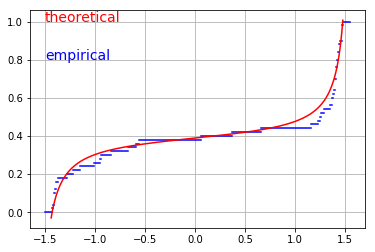

In [10]:
x_list = []
y_list = []
i = math.atan(-7)-0.01
while i <= math.atan(11)+0.01:
    x_list.append(i)
    y_list.append(math.tan(i) / 18 + 7 / 18)
    i += 0.01
build_graphics(empirical_function, "blue")
plt.text(-1.5, 1, "theoretical", color="red", fontsize=14)
plt.text(-1.5, 0.8, "empirical", color="blue", fontsize=14)
plt.grid()
plt.plot(x_list, y_list,  color="red")
plt.show()